## Capstone- Cancer Histopathology: Pretrained Models

Dataset:
- A. Borkowski, "Lung and Colon Cancer Histopathological Images", Kaggle.com, 2020. [Online]. Available: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images. [Accessed: 30- Jul- 2022].

Sources:
- Borkowski AA, Bui MM, Thomas LB, Wilson CP, DeLand LA, Mastorides SM. Lung and Colon Cancer Histopathological Image Dataset (LC25000). arXiv:1912.12142v1 [eess.IV], 2019

Image Labels:
- Lung benign tissue: 3
- Lung adenocarcinoma: 2
- Lung squamous cell carcinoma: 4
- Colon adenocarcinoma: 0
- Colon benign tissue: 1

### Import Libraries

In [2]:
## Import Libraries
import numpy as np
import pandas as pd
import re as regex
from pathlib import Path
import time
import math

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

import string
from collections import Counter

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load Data

In [3]:
import PIL
from PIL import Image
import glob
import os, os.path
from numpy import asarray

import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from IPython.display import display, HTML
import pymongo
from pymongo import MongoClient
import io
from bson.binary import Binary

In [49]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Model, Sequential
from keras.applications.xception import Xception
from keras.applications import *
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from keras.layers import BatchNormalization
from keras.models import load_model

In [5]:
%%time
dfShuffledData= pd.DataFrame(np.load('shufGenData96.npy', allow_pickle= True),
                             columns=['imageVector', 'label', 'classLabel', 'image', 'labelName'])
dfShuffledData.head()

CPU times: total: 2.05 s
Wall time: 27.9 s


,imageVector,label,classLabel,image,labelName
0,"[[[0.9960785, 0.98823535, 0.9921569], [0.98823...","[1.0, 0.0, 0.0, 0.0, 0.0]",0,<PIL.Image.Image image mode=RGB size=96x96 at ...,colon_aca
1,"[[[0.98823535, 0.97647065, 0.9568628], [0.8470...","[1.0, 0.0, 0.0, 0.0, 0.0]",0,<PIL.Image.Image image mode=RGB size=96x96 at ...,colon_aca
2,"[[[0.79215693, 0.6745098, 0.96470594], [0.7647...","[0.0, 0.0, 1.0, 0.0, 0.0]",2,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_aca
3,"[[[0.83921576, 0.5647059, 0.7686275], [0.85882...","[0.0, 0.0, 0.0, 1.0, 0.0]",3,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_n
4,"[[[0.40000004, 0.21176472, 0.7411765], [0.1647...","[0.0, 0.0, 0.0, 0.0, 1.0]",4,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_scc


In [6]:
def originSize(image):
    imgVect= image * 255.0
    return imgVect

In [7]:
%%time
dfShuffledData['originSize']= dfShuffledData['imageVector'].apply(originSize)

CPU times: total: 56.3 s
Wall time: 56.3 s


In [8]:
dfShuffledData.head()

,imageVector,label,classLabel,image,labelName,originSize
0,"[[[0.9960785, 0.98823535, 0.9921569], [0.98823...","[1.0, 0.0, 0.0, 0.0, 0.0]",0,<PIL.Image.Image image mode=RGB size=96x96 at ...,colon_aca,"[[[254.00002, 252.00002, 253.00002], [252.0000..."
1,"[[[0.98823535, 0.97647065, 0.9568628], [0.8470...","[1.0, 0.0, 0.0, 0.0, 0.0]",0,<PIL.Image.Image image mode=RGB size=96x96 at ...,colon_aca,"[[[252.00002, 249.00002, 244.00002], [216.0000..."
2,"[[[0.79215693, 0.6745098, 0.96470594], [0.7647...","[0.0, 0.0, 1.0, 0.0, 0.0]",2,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_aca,"[[[202.00002, 172.0, 246.00002], [195.00002, 1..."
3,"[[[0.83921576, 0.5647059, 0.7686275], [0.85882...","[0.0, 0.0, 0.0, 1.0, 0.0]",3,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_n,"[[[214.00002, 144.0, 196.00002], [219.00002, 1..."
4,"[[[0.40000004, 0.21176472, 0.7411765], [0.1647...","[0.0, 0.0, 0.0, 0.0, 1.0]",4,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_scc,"[[[102.00001, 54.000004, 189.0], [42.0, 0.0, 1..."


In [9]:
%%time
imgVectData= np.array(dfShuffledData['originSize'].tolist())
imgVectData.shape

CPU times: total: 906 ms
Wall time: 920 ms


(25000, 96, 96, 3)

In [10]:
%%time
imgVectData01= np.array(dfShuffledData['imageVector'].tolist())
imgVectData01.shape

CPU times: total: 1.44 s
Wall time: 1.42 s


(25000, 96, 96, 3)

In [11]:
labelData01= np.array(dfShuffledData['label'].tolist())
labelData01.shape

(25000, 5)

In [12]:
# data_dir = "./lung_colon_image_set/lung_image_sets"

# # 70-30 Split
# data = ImageDataGenerator(validation_split = 0.3)

# BATCH_SIZE = 20

# # 224 x 224 -- The minimum for EfficientNetB7, you can go as high as 600 x 600
# X = Y = 96

# train_ds = data.flow_from_directory(data_dir,
#                                     class_mode = "categorical",
#                                     target_size = (X, Y),
#                                     color_mode="rgb",
#                                     batch_size = BATCH_SIZE, 
#                                     shuffle = False,
#                                     subset='training',
#                                     seed = 42)

# validation = data.flow_from_directory(data_dir,
#                                       class_mode = "categorical",
#                                       target_size = (X, Y),
#                                       color_mode="rgb",
#                                       batch_size = BATCH_SIZE, 
#                                       shuffle = False,
#                                       subset='validation',
#                                       seed = 42)

### Prepare data

In [13]:
# Prepare input data
X= imgVectData
X2= imgVectData01

# output
y= labelData01.astype(np.uint8)

In [14]:
X.shape

(25000, 96, 96, 3)

In [15]:
y.shape

(25000, 5)

In [16]:
%%time
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 65)
X2_train, X2_test, y2_train, y2_test= train_test_split(X2, y, test_size= 0.3, random_state= 65)

CPU times: total: 29.7 s
Wall time: 50.3 s


In [17]:
X_train.shape

(17500, 96, 96, 3)

In [18]:
X_test.shape

(7500, 96, 96, 3)

In [19]:
y_train.shape

(17500, 5)

### Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [20]:
# Set up the model architecture
model= Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', data_format = 'channels_last',
                        padding = 'valid',input_shape=(96, 96, 3)))
model.add(layers.MaxPooling2D((5, 5)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 18, 18, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        1168      
                                                                 
Total params: 1,392
Trainable params: 1,392
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 18, 18, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        1168      
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 64)                262208    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

### Complie the model

In [24]:
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
    metrics=['accuracy'])

### Fit the training data

In [25]:
imgVectData.shape

(25000, 96, 96, 3)

In [26]:
labelData01.shape

(25000, 5)

In [27]:
X_train.shape

(17500, 96, 96, 3)

In [28]:
y_train.shape

(17500, 5)

In [29]:
def fit_model(model, train_it, validate_it, epochs= 4):
    es= EarlyStopping(monitor= 'val_loss', mode= 'min', verbose= 1, patience= 5)
    
    for layer in model.layers:
        layer.trainable= False
    
    flat1= Flatten()(model.layers[-1].output)
    output= Dense(len(train_it.class_indices), activation= 'softmax')(flat1)
    
    model= Model(inputs= model.inputs, outputs= output)
    print(model.summary())
    
    model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])

    history= model.fit(train_it, validation_data= validate_it, epochs= epochs, verbose= 1, callbacks= [es])
    return [model, history]

In [183]:
def fit_cnnMod01(X_train, y_train, epochs= 10):
    es= EarlyStopping(monitor= 'val_loss', mode= 'min', verbose= 1, patience= 5)
    model= Sequential()
    model.add(layers.Conv2D(16, (3, 3), activation='relu', data_format = 'channels_last',
                            padding = 'valid',input_shape=(96, 96, 3)))
    model.add(layers.MaxPooling2D((5, 5)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
#     model.add(layers.Dropout(0.2))
    model.add(layers.Dense(5, activation='softmax'))
    print(model.summary())
    
    model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])

    history= model.fit(X_train, y_train, validation_split= 0.3, epochs= epochs, batch_size= 20,
                       verbose= 1, callbacks= [es])
    return [model, history]

In [166]:
def fit_cnnMod02(X_train, y_train, epochs= 10):
    es= EarlyStopping(monitor= 'val_loss', mode= 'min', verbose= 1, patience= 5)
    model= Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation= 'relu', data_format= 'channels_last',
                            padding= 'valid' ,input_shape= (96, 96, 3)))
    model.add(layers.MaxPooling2D((5, 5)))
    model.add(layers.Conv2D(64, (3, 3), activation= 'relu'))
    model.add(BatchNormalization(momentum= 0.01))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation= 'relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(5, activation='softmax'))
    print(model.summary())
    
    model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])

    history= model.fit(X_train, y_train, validation_split= 0.3, epochs= epochs, batch_size= 20,
                       verbose= 1, callbacks= [es])
    return [model, history]

In [32]:
def fit_preTrainMod01(model, X_train, y_train, epochs= 10):
    es= EarlyStopping(monitor= 'val_loss', mode= 'min', verbose= 1, patience= 5)
    
    for layer in model.layers:
        layer.trainable= False
    
    flat1= Flatten()(model.layers[-1].output)
    output= Dense(y_train.shape[1], activation= 'softmax')(flat1)
    
    model= Model(inputs= model.inputs, outputs= output)
    print(model.summary())
    
    model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])

    history= model.fit(X_train, y_train, validation_split= 0.3, epochs= epochs, batch_size= 20,
                       verbose= 1, callbacks= [es])
    return [model, history]

In [33]:
num_classes= y_train.shape[1]
num_classes

5

In [34]:
model01= VGG16(include_top= False, input_shape= (96, 96, 3), weights= 'imagenet')
model02= VGG19(include_top= False, input_shape= (96, 96, 3), weights= 'imagenet')
# model03= ResNet50(include_top= False, input_shape= (96, 96, 3), weights= 'imagenet')
model04= Xception(include_top= False, input_shape= (96, 96, 3), weights= 'imagenet')
model05= InceptionV3(include_top= False, input_shape= (96, 96, 3), weights= 'imagenet')
# model06= MobileNet(include_top= False, input_shape= (96, 96, 3), weights= 'imagenet')

In [208]:
modelTag= ['VGG16', 'VGG19', 'ResNet50', 'Xception', 'InceptionV3', 'cnnMk01', 'cnnMk02']
imageTag= []
for i in range(16, 30):
    if (i <= 9):
        img= f'image0{i}'
        imageTag.append(img)
    else:
        img= f'image{i}'
        imageTag.append(img)
imageTag

['image16',
 'image17',
 'image18',
 'image19',
 'image20',
 'image21',
 'image22',
 'image23',
 'image24',
 'image25',
 'image26',
 'image27',
 'image28',
 'image29']

In [116]:
def visualCostPlot(histMod, modelTag, imageTag):
    fig, ax = plt.subplots(1, 2, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    plt.rcParams.update({'font.size': 18})

    # Plot training & validation accuracy values
    ax[0].plot(histMod.history['accuracy'], label = 'Training')
    ax[0].plot(histMod.history['val_accuracy'], label = 'Validation')
    ax[0].set_title(f'Model accuracy ({modelTag})')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend()

    # Plot training & validation loss values
    ax[1].plot(histMod.history['loss'], label = 'Training')
    ax[1].plot(histMod.history['val_loss'], label = 'Validation')
    ax[1].set_title(f'Model loss ({modelTag})')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend()
    plt.savefig(f'{imageTag}.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
    plt.show()

In [35]:
# for layer in model02.layers:
#     layer.trainable= False
    
#     flat1= Flatten()(model02.layers[-1].output)
#     output= Dense(y_train.shape[1], activation= 'softmax')(flat1)
    
#     model02= Model(inputs= model02.inputs, outputs= output)
# print(model02.summary())

In [36]:
# model01.compile(
#     loss= 'categorical_crossentropy',
#     optimizer= 'adam',
#     metrics= ['accuracy'])

In [37]:
# history= model01.fit(train_it, validation_data= validate_it, epochs= 4, verbose= 1)

In [38]:
# %%time
# # Fit the model on a training set
# history = model.fit(
#     X_train,
#     y_train,
#     validation_split= 0.3,
# #     validation_data=(X2_test, y2_test),
#     epochs= 10,
# #     batch_size = 10,
#     verbose= 1)

#### cnnMk01 Fit & Visualisation of cost

In [184]:
%%time
tic01= time.time()
cnnMkMod01= fit_cnnMod01(X_train, y_train)
toc01= time.time()
runTimeFit01= (toc01-tic01)*1000

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_163 (Conv2D)         (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 18, 18, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_164 (Conv2D)         (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_165 (Conv2D)         (None, 6, 6, 32)          9248      
                                                                 
 flatten_32 (Flatten)        (None, 1152)            

In [40]:
# %%time
# tic02= time.time()
# preTrain01= fit_model(model01, train_ds, validation)
# toc02= time.time()
# runTimeFitPreTrainMod01= (toc02-tic02)*1000

In [185]:
cnnMkMod01[0].save('cnnMkMod01.h5')

In [223]:
cnnMk01Tuple= (modelTag[5], runTimeFit01)

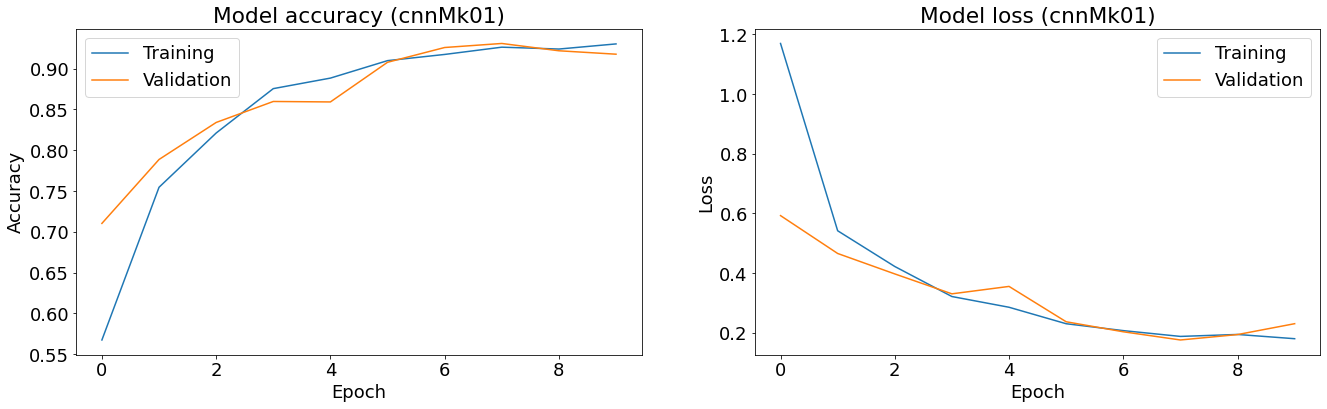

In [209]:
cnnMk01Cost= visualCostPlot(cnnMkMod01[1], modelTag[5], imageTag[0])

#### cnnMk02 Fit & Visualisation of cost

In [167]:
%%time
tic03= time.time()
cnnMkMod02= fit_cnnMod02(X_train, y_train)
toc03= time.time()
runTimeFit03= (toc03-tic03)*1000

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_151 (Conv2D)         (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 18, 18, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_152 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_114 (Ba  (None, 16, 16, 64)       256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                     

In [168]:
cnnMkMod02[0].save('cnnMkMod02.h5')

In [224]:
cnnMk02Tuple= (modelTag[6], runTimeFit03)

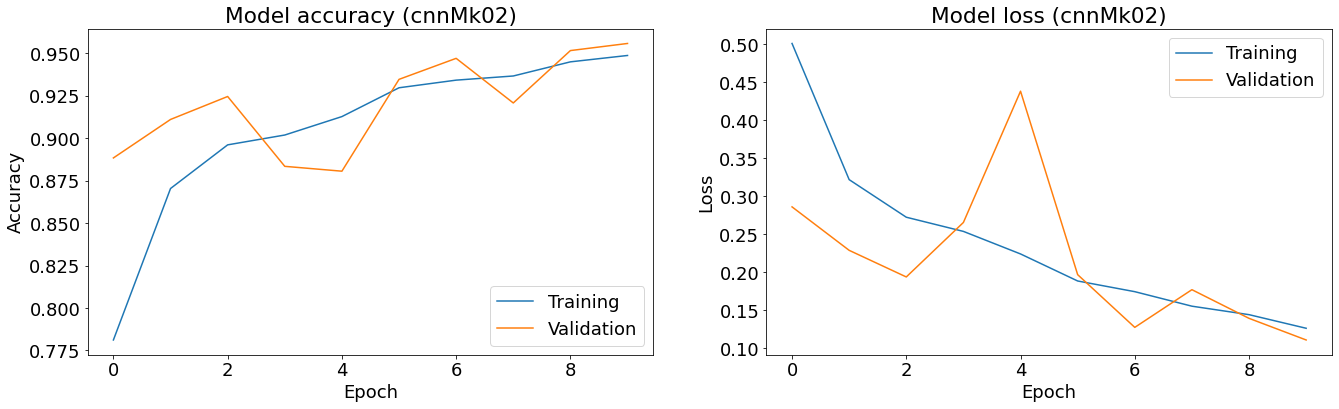

In [210]:
cnnMk02Cost= visualCostPlot(cnnMkMod02[1], modelTag[6], imageTag[1])

#### VGG16 Model Fit & Visualisation of cost

In [41]:
%%time
tic02= time.time()
preTrain02= fit_preTrainMod01(model01, X_train, y_train)
toc02= time.time()
runTimeFit02= (toc02-tic02)*1000

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0     

In [51]:
preTrain02[0].save('vgg16Mod.h5')

In [225]:
vgg16Tuple= (modelTag[0], runTimeFit02)

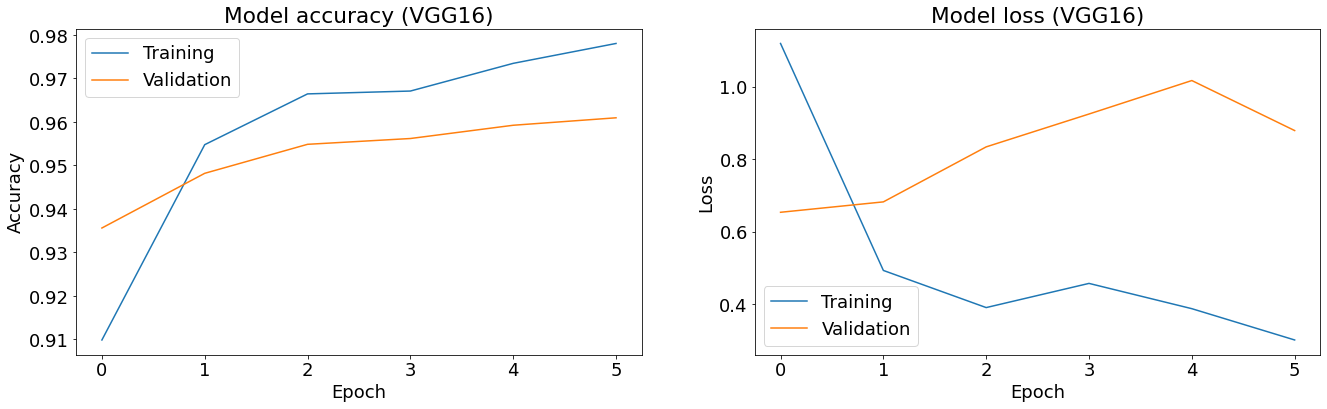

In [119]:
vgg16Cost= visualCostPlot(preTrain02[1], modelTag[0], imageTag[2])

#### VGG19 Model Fit & Visualisation of cost

In [120]:
%%time
tic04= time.time()
preTrain04= fit_preTrainMod01(model02, X_train, y_train)
toc04= time.time()
runTimeFit04= (toc04-tic04)*1000

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0   

In [121]:
preTrain04[0].save('vgg19Mod.h5')

In [226]:
vgg19Tuple= (modelTag[1], runTimeFit04)

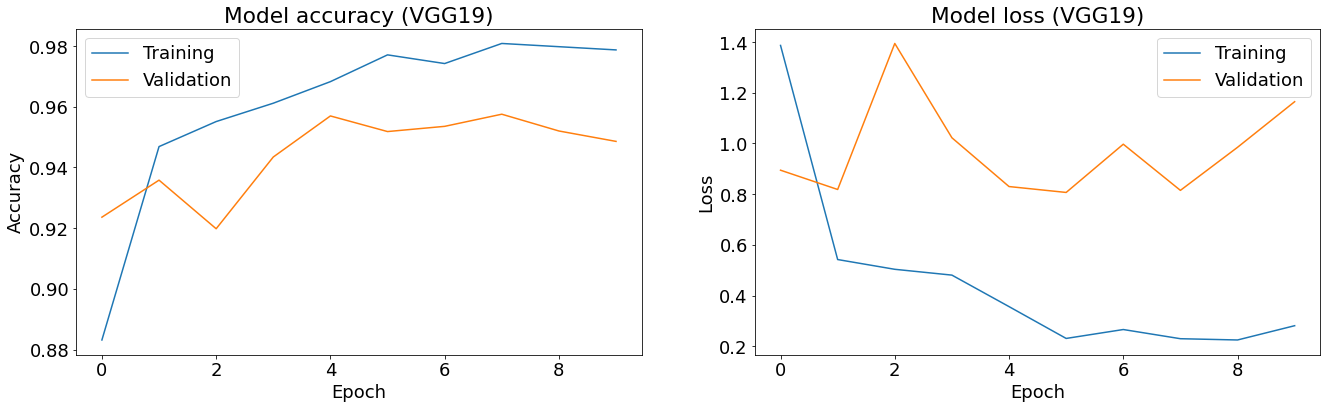

In [122]:
vgg19Cost= visualCostPlot(preTrain04[1], modelTag[1], imageTag[3])

#### ResNet50 Model Fit & Visualisation of cost

In [143]:
# %%time
# tic05= time.time()
# preTrain05= fit_preTrainMod01(model03, X_train, y_train)
# toc05= time.time()
# runTimeFit05= (toc05-tic05)*1000

In [ ]:
# preTrain05[0].save('resNet50Mod.h5')

In [ ]:
# resNet50Cost= visualCostPlot(preTrain05[1], modelTag[2], imageTag[4])

#### Xception Model Fit & Visualisation of cost

In [144]:
%%time
tic06= time.time()
preTrain06= fit_preTrainMod01(model04, X_train, y_train)
toc06= time.time()
runTimeFit06= (toc06-tic06)*1000

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 47, 47, 32)   864         ['input_4[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 47, 47, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                                  
 block1_conv1_act (Activation)  (None, 47, 47, 32)   0           ['block1_conv1_bn[0][0]']  

                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 12, 12, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 12, 12, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)                                                                                        
                                                                                                  
 conv2d_4 (Conv2D)              (None, 6, 6, 728)    186368      ['add_1[0][0]']                  
                                                                                                  
 block4_pool (MaxPooling2D)     (None, 6, 6, 728)    0           ['block4_sepconv2_bn[0][0]']     
          

 block7_sepconv1_bn (BatchNorma  (None, 6, 6, 728)   2912        ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 6, 6, 728)   0           ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, 6, 6, 728)   536536      ['block7_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv2_bn (BatchNorma  (None, 6, 6, 728)   2912        ['block7_sepconv2[0][0]']        
 lization)

                                                                                                  
 block10_sepconv1_act (Activati  (None, 6, 6, 728)   0           ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 6, 6, 728)   536536      ['block10_sepconv1_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block10_sepconv1_bn (BatchNorm  (None, 6, 6, 728)   2912        ['block10_sepconv1[0][0]']       
 alization)                                                                                       
                                                                                                  
 block10_s

 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 6, 6, 728)   2912        ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (Add)                   (None, 6, 6, 728)    0           ['block12_sepconv3_bn[0][0]',    
                                                                  'add_9[0][0]']                  
                                                                                                  
 block13_sepconv1_act (Activati  (None, 6, 6, 728)   0           ['add_10[0][0]']                 
 on)                                                                                              
          

In [145]:
preTrain06[0].save('xceptionMod.h5')

In [227]:
xceptionTuple= (modelTag[3], runTimeFit06)

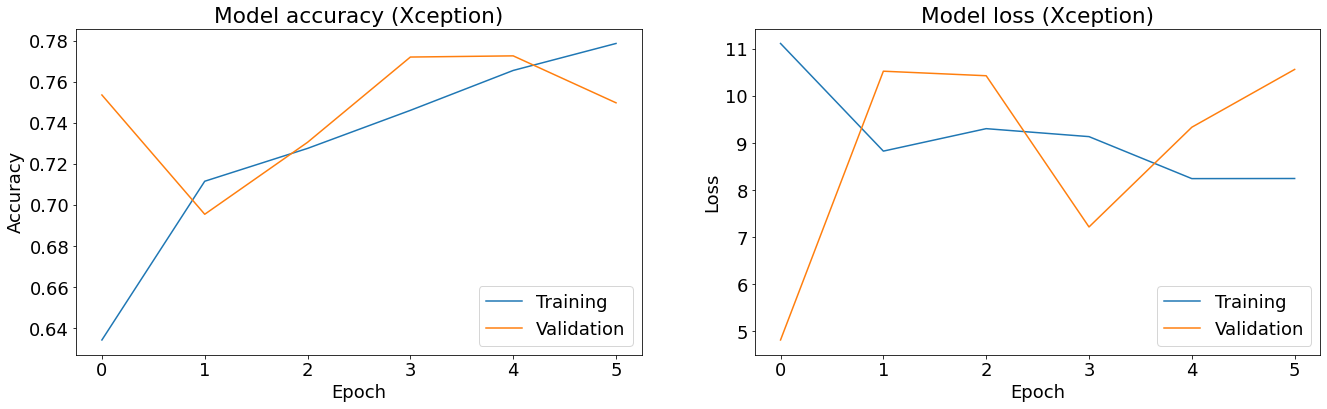

In [146]:
xceptionCost= visualCostPlot(preTrain06[1], modelTag[3], imageTag[5])

#### InceptionV3 Model Fit & Visualisation of cost

In [147]:
%%time
tic07= time.time()
preTrain07= fit_preTrainMod01(model05, X_train, y_train)
toc07= time.time()
runTimeFit07= (toc07-tic07)*1000

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 47, 47, 32)   864         ['input_5[0][0]']                
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 47, 47, 32)  96          ['conv2d_6[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation (Activation)        (None, 47, 47, 32)   0           ['batch_normalization_4[0][

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_15 (BatchN  (None, 9, 9, 32)    96          ['conv2d_17[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 9, 9, 64)     0           ['batch_normalization_9[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 9, 9, 64)     0           ['batch_normalization_11[0][0]'] 
                                                                                                  
 activation_10 (Activation)     (None, 9, 9, 96)     0           ['batch_normalization_14[0][0]'] 
          

                                                                                                  
 conv2d_29 (Conv2D)             (None, 9, 9, 96)     55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_24 (BatchN  (None, 9, 9, 48)    144         ['conv2d_26[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_27 (BatchN  (None, 9, 9, 96)    288         ['conv2d_29[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_20 (Activation)     (None, 9, 9, 48)     0           ['batch_normalization_24[0][0]'] 
          

 conv2d_40 (Conv2D)             (None, 4, 4, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_38 (BatchN  (None, 4, 4, 128)   384         ['conv2d_40[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 4, 4, 128)    0           ['batch_normalization_38[0][0]'] 
                                                                                                  
 conv2d_41 (Conv2D)             (None, 4, 4, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_normalization_39 (BatchN  (None, 4, 4, 128)   384         ['conv2d_41[0][0]']              
 ormalizat

 activation_44 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_48[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 4, 4, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_49 (BatchN  (None, 4, 4, 160)   480         ['conv2d_51[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_49[0][0]'] 
                                                                                                  
 conv2d_47 (Conv2D)             (None, 4, 4, 160)    122880      ['mixed4[0][0]']                 
          

 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_59[0][0]'] 
                                                                                                  
 conv2d_57 (Conv2D)             (None, 4, 4, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_62 (Conv2D)             (None, 4, 4, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 4, 4, 160)   480         ['conv2d_57[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_72 (Conv2D)             (None, 4, 4, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_65 (BatchN  (None, 4, 4, 192)   576         ['conv2d_67[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_70 (BatchN  (None, 4, 4, 192)   576         ['conv2d_72[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_61 (Activation)     (None, 4, 4, 192)    0           ['batch_normalization_65[0][0]'] 
          

                                                                                                  
 batch_normalization_78 (BatchN  (None, 4, 4, 192)   576         ['conv2d_80[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 4, 4, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 4, 4, 192)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 conv2d_77 (Conv2D)             (None, 1, 1, 320)    552960      ['activation_70[0][0]']          
                                                                                                  
 conv2d_81

 activation_82 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_86[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_87[0][0]'] 
                                                                                                  
 batch_normalization_88 (BatchN  (None, 1, 1, 192)   576         ['conv2d_90[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_80[0][0]'] 
                                                                                                  
 mixed9_0 (Concatenate)         (None, 1, 1, 768)    0           ['activation_78[0][0]',          
          

                                                                                                  
 activation_85 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_89[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 1, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 1, 1, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activation_93 (Activation)     (None, 1, 1, 192)    0           ['batch_normalization_97[0][0]'] 
          

In [148]:
preTrain07[0].save('inceptionV3Mod.h5')

In [228]:
inceptionV3Tuple= (modelTag[4], runTimeFit07)

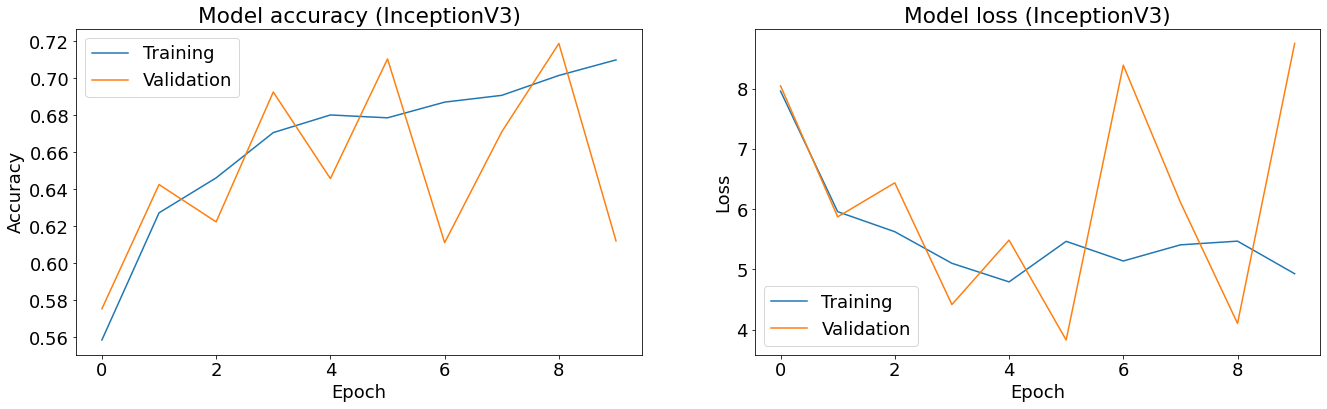

In [149]:
inceptionV3Cost= visualCostPlot(preTrain07[1], modelTag[4], imageTag[6])

### Create Predictions

In [187]:
cnnMk01= load_model('cnnMkMod01.h5')
# model.make_predict_function()

In [188]:
%%time
# predictions = model.predict_classes(X_test)
cnnMk01predict_x= cnnMk01.predict(X_test) 
# classes_x= np.argmax(predict_x, axis=1)
cnnMk01classes_x= cnnMk01predict_x.argmax(axis= 1)

235/235 [==============================] - 28s 120ms/step
CPU times: total: 48.9 s
Wall time: 28.6 s


### Evaluate the model

In [189]:
%%time
tic08= time.time()
cnnMk01Score= cnnMk01.evaluate(X_test, y_test, batch_size= 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(cnnMk01Score))
toc08= time.time()
cnnMk01RunTimeEval= (toc08-tic08)*1000

750/750 [==============================] - 57s 76ms/step - loss: 0.2155 - accuracy: 0.9171

Test loss: 0.215489, Test accuracy: 0.917067
CPU times: total: 1min 19s
Wall time: 57.4 s


In [190]:
def print_cm(cm):
    d_size= max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_r= 'r%%0%dd' % d_size
        fmt_c= ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s= fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
            print(s)
    else: # make dense
        c= '%%%dd ' % d_size
        s= '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s= '%2d| ' % i
            s += c * len(r)
            print(s % tuple(r))

In [191]:
y_test_target= np.array([x.argmax() for x in y_test])
cm= confusion_matrix(y_test_target, cnnMk01classes_x)
print_cm(cm)

    |    0    1    2    3    4 
-------------------------------
 0| 1462   51    4   26    4 
 1|   76 1404    0    7    0 
 2|   32    0 1347   22  105 
 3|    0    0   25 1477    1 
 4|    4    0  264    1 1188 


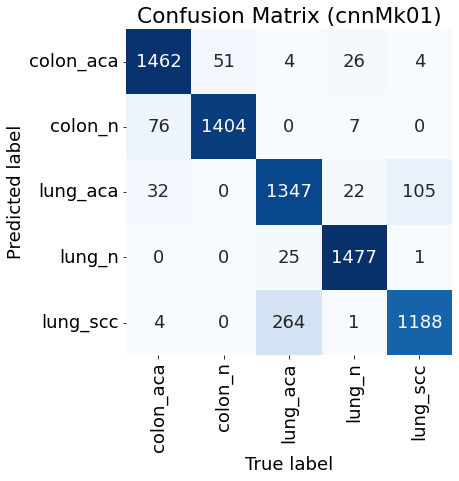

In [192]:
confuseLabels= ('colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc')
# plot
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
# Confusion Matrix
sns.heatmap(cm, square= True, annot= True, fmt= 'd', cbar= False, cmap= 'Blues', ax= ax,
           xticklabels= confuseLabels, yticklabels= confuseLabels)

ax.set_title(f'Confusion Matrix (cnnMk01)')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')
    
plt.savefig(f'{imageTag[7]}.png', facecolor='w', bbox_inches="tight",
        pad_inches=0.3, transparent=True)

plt.show()

In [200]:
%%time
# define 5-fold cross validation test harness
kfold= KFold(n_splits= 5, shuffle= True, random_state= 65)
cvScores= []
for train, test in kfold.split(X_train, y_train):
#     print(X[train].shape, y[train].shape)
    scores= cnnMk01.evaluate(X[train], y[train], batch_size= 10, verbose= 1)
    print("%s: %.4f" % (cnnMk01.metrics_names[1], scores[1]))
    cvScores.append(scores[1])
meanAcc= np.mean(cvScores)
print(cvScores, meanAcc)
print("%.4f (+/- %.4f)" % (np.mean(cvScores), np.std(cvScores)))

1400/1400 [==============================] - 92s 66ms/step - loss: 0.1929 - accuracy: 0.9271
accuracy: 0.9271
1400/1400 [==============================] - 83s 59ms/step - loss: 0.1949 - accuracy: 0.9264
accuracy: 0.9264
1400/1400 [==============================] - 88s 63ms/step - loss: 0.1968 - accuracy: 0.9256
accuracy: 0.9256
1400/1400 [==============================] - 91s 65ms/step - loss: 0.1914 - accuracy: 0.9274
accuracy: 0.9274
1400/1400 [==============================] - 70s 50ms/step - loss: 0.1868 - accuracy: 0.9275
accuracy: 0.9275
[0.927142858505249, 0.9263571500778198, 0.9255714416503906, 0.9274285435676575, 0.9275000095367432] 0.9268000006675721
0.9268 (+/- 0.0007)
CPU times: total: 10min 51s
Wall time: 7min 11s


In [201]:
cnnMk01ClassReport= classification_report(y_test_target, cnnMk01classes_x)
print(cnnMk01ClassReport)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1547
           1       0.96      0.94      0.95      1487
           2       0.82      0.89      0.86      1506
           3       0.96      0.98      0.97      1503
           4       0.92      0.82      0.86      1457

    accuracy                           0.92      7500
   macro avg       0.92      0.92      0.92      7500
weighted avg       0.92      0.92      0.92      7500



In [202]:
cnnMk01ClassReportDict= classification_report(y_test_target, cnnMk01classes_x, output_dict= True)
cnnMk01ClassReportDict['1']['precision']

0.9649484536082474

In [203]:
arr01= []
for i in cnnMk01ClassReportDict['macro avg']:
    cnnMk01ClassMetric= cnnMk01ClassReportDict['macro avg'][i]
    arr01.append(cnnMk01ClassMetric)

arr01.append('cnnMk01')
arr01.append(cnnMk01RunTimeEval)
arr01.append(meanAcc)
arr01

[0.9187716368475938,
 0.916347098971689,
 0.9166160341126985,
 7500,
 'cnnMk01',
 57424.52144622803,
 0.9268000006675721]

In [231]:
fitTimeArr= []
fitTimeArr.append(cnnMk01Tuple)
fitTimeArr.append(cnnMk02Tuple)
fitTimeArr.append(vgg16Tuple)
fitTimeArr.append(vgg19Tuple)
fitTimeArr.append(xceptionTuple)
fitTimeArr.append(inceptionV3Tuple)

fitTimeArr

[('cnnMk01', 3151950.782060623),
 ('cnnMk02', 6678085.579872131),
 ('VGG16', 5054647.789001465),
 ('VGG19', 9945825.336933136),
 ('Xception', 4200958.9104652405),
 ('InceptionV3', 23589996.67286873)]

In [232]:
np.save('preTrainFitTime.npy', fitTimeArr)

In [204]:
# %%time
# def baseline_model02(model, y_train):
#     for layer in model.layers:
#         layer.trainable= False
    
#     flat1= Flatten()(model.layers[-1].output)
#     output= Dense(y_train.shape[1], activation= 'softmax')(flat1)
    
#     model= Model(inputs= model.inputs, outputs= output)
# #     print(model.summary())
    
#     model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])
#     return model
# # evaluate model
# clf= KerasRegressor(model= baseline_model02(model01, y2_train), validation_split= 0.3, epochs= 1,
#                     batch_size= 20, verbose= 1)
# kfold= KFold(n_splits= 5)
# results= cross_val_score(clf, X2_train, y2_train, cv= kfold)
# print("Baseline: %.2f (%.2f) Accuracy" % (results.mean(), results.std()))

### Visualisation of cost

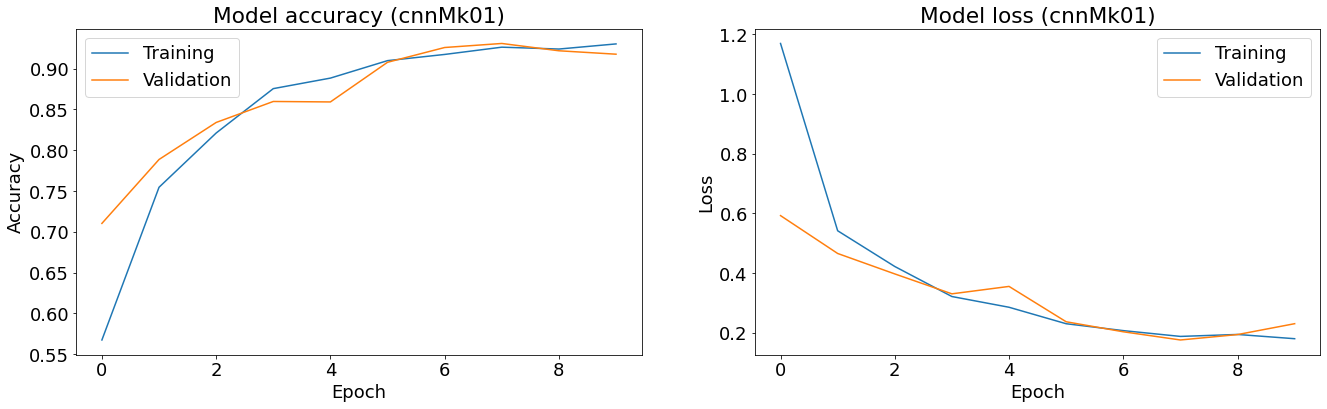

In [207]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(cnnMkMod01[1].history['accuracy'], label = 'Training')
ax[0].plot(cnnMkMod01[1].history['val_accuracy'], label = 'Validation')
ax[0].set_title('Model accuracy (cnnMk01)')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(cnnMkMod01[1].history['loss'], label = 'Training')
ax[1].plot(cnnMkMod01[1].history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss (cnnMk01)')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()
plt.savefig(f'{imageTag[8]}.png', facecolor='w', bbox_inches="tight",
        pad_inches=0.3, transparent=True)
plt.show()